## Final Project Submission

Please fill out:
* Student name: Kosta Tzioumis
* Student pace: part time
* Scheduled project review date/time: 02/06/2019
* Instructor name: Eli Thomas
* Blog post URL: ...yeah I'll get right on that



Import necessary modules to begin:

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

load dataset into pandas dataframe to begin analysis! 
View first 5 rows to get a feel for data and data types

In [79]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Inspect the the data frame info, looking for overall size, variables with significant missing data, variable datatypes are what is expected

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


id is an unnecessary feature as the data is already indexed in the data frame. This column can be dropped.

In [81]:
df.drop(columns=['id'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [82]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

waterfront and yr_renovated both have many missing values, missing values also present in view but very few.

Tackle these one at a time starting with waterfront

In [83]:
df.waterfront.value_counts()


0.0    19075
1.0      146
Name: waterfront, dtype: int64

Categorical feature representing whether or not the house is on the waterfront. Very few houses are 1.0. 
Waterfront locations appear to be quite rare, I don't think it is unreasonable to set the missing values to 0

In [84]:
df.waterfront.fillna(value=0,inplace=True)
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

OK, thats waterfront missing values taken care of, while I'm at it this feature is categorical not numeric, I'm goign to change it datatype=category

In [85]:
df.waterfront=df.waterfront.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null category
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(1), float64(7), int64(10), object(2)
memory usage: 3.2+ MB


Now I'll investigate the missing vales on view 

In [86]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Onto the next most missing data - yr_renovated. This is a numerical feature representing a the year of renovation. Start by getting some basic statistics on the data

In [87]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

This would indicate alot of 0's in the data, these could also be considered missing data as the house cannot have been renovated in the year 0. 0 is a placeholder. Most likely indicating the house has not been renovated since building

In [88]:
df.yr_renovated.value_counts().head()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

Yep, 17 thousand 0s, by far the most common entry. For now I'm goign to set the missing data to 0 and consider how to deal with this feature later

In [89]:
df.yr_renovated.fillna(value=0.0,inplace=True)
df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

The feature describes the number of times a house has been viewed. There is a 0.0 value that represents the house has not been viewed while it may be the case that the missing data represents house that have not been viewed since there are relatively few pieces of missing data it would be safer to drop these rows than make assumptions that may bias our data set

In [90]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

NO MORE MISSING DATA!! (or is there?)
Most of the data is numerical but there were 2 object data types in the initial info description - date and sqft_basement
date is date string this makes sense (but we'll check it for nonsense anyway)
sqft_basement should be a numerical feature, why isnt it? Maybe some weird shit here

In [91]:
df.sqft_basement.describe()

count     21534
unique      302
top         0.0
freq      12798
Name: sqft_basement, dtype: object

In [92]:
df.sqft_basement.value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
450.0       103
530.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
850.0        71
          ...  
266.0         1
172.0         1
588.0         1
2490.0        1
3480.0        1
415.0         1
1248.0        1
1275.0        1
1135.0        1
225.0         1
248.0         1
1481.0        1
3000.0        1
3500.0        1
861.0         1
417.0         1
1548.0        1
652.0         1
862.0         1
1880.0        1
1024.0        1
2500.0        1
65.0          1
935.0         1
2720.0        1
1852.0        1
2050.0        1
875.0         1
1284.0        1
1245.0        1
Name: sqft_basement, Len

'?' appears to have been used as placeholder for missing data. There are also a lot of 0's in this data, presumably from houses without basements. From our column descriptions the sqft_basement is the difference between the sqft_living and sqft_above. SO I'm goign to take a look at these variale too to determine what to do with this missing data

In [93]:
df.sqft_living.describe()

count    21534.000000
mean      2079.827854
std        917.446520
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [94]:
df.sqft_above.describe()

count    21534.000000
mean      1788.557537
std        827.745641
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

No zeros , no negatives and absurd outliers in these features that would indicate placeholders for missing data
So I'm going to look at those entries that have a '?'

In [95]:
df[['sqft_living','sqft_above']].loc[df.sqft_basement=='?'].head(10)

,sqft_living,sqft_above
6,1715,1715
18,1200,1200
42,3595,3595
79,3450,3450
112,1540,1160
115,4380,2780
217,2250,2250
309,3320,2220
384,4800,3480
508,1540,820


So we can see from just these entries there are some cases where the sqft_basement = 0 and some where sqft_basement>0
Just one more check of the dataframe for errors, are there any entries where the sqft_above>sqft_living? This is impossible by our definitions of these features

In [96]:
df.loc[df.sqft_above>df.sqft_living]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


OK, good, no tardis houses. So where are these missing values?

In [97]:
df.loc[df.sqft_basement=='?'].index

Int64Index([    6,    18,    42,    79,   112,   115,   217,   309,   384,
              508,
            ...
            21236, 21248, 21356, 21357, 21365, 21442, 21447, 21473, 21519,
            21581],
           dtype='int64', length=452)

Found where they are, now I can replace them with the difference between the sqft_living and sqft_above

In [98]:
for i in df.loc[df['sqft_basement']=='?'].index:
    df['sqft_basement'][i]=df['sqft_living'][i]-df['sqft_above'][i]
    

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [99]:
df.loc[df.sqft_basement=='?'].index

Int64Index([], dtype='int64')

No more ?s
so now this feature is all numerical and we can set its datatype to float64

In [100]:
df.sqft_basement=df.sqft_basement.astype(float)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null category
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: category(1), float64(8), int64(10), object(1)
memory usage: 3.9+ MB


OK our last remaining object datatype is for the date feature, date sstring data is goign to be difficul;t ot include in our generalized model, as with the walmart data we may need ot drop this column

Lets continue our data exploration of the numerical data by looking at the summary statistics

In [102]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.233863,3.409724,7.657425,1788.557537,291.270317,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,0.650654,1.172643,827.745641,442.199825,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [103]:
df.floors.value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

This can probably be turned into a categorical value, possibly also views 
Maybe later, for now histograms

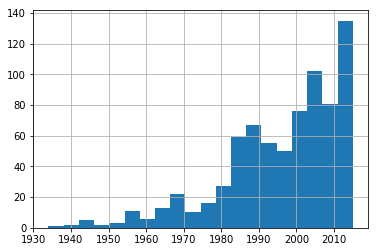

In [104]:
df.yr_renovated.loc[df.yr_renovated>0].hist(bins=20)

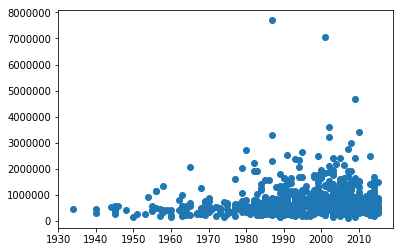

In [105]:
renovated=df.loc[df.yr_renovated>0]
plt.scatter(renovated.yr_renovated,renovated.price)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028045C98EF0>,
      dtype=object)

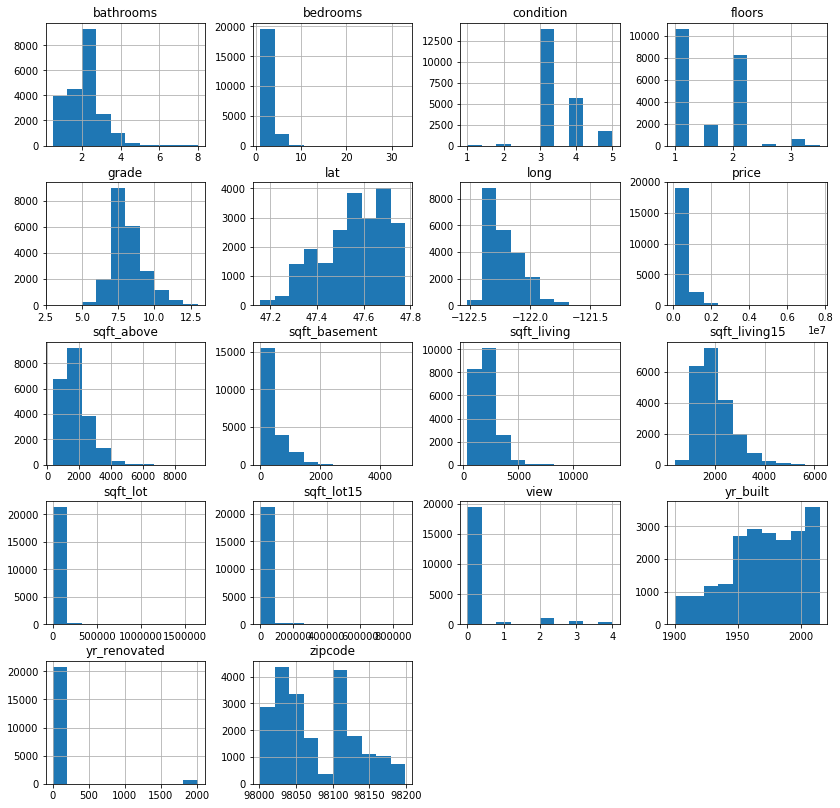

In [106]:
df.hist(figsize=(14,14))

Heavily skewed price data, bedrooms, bathroom, sqft_lot, sqft_living
from previous description bedrooms goes all the way up to 33 but is this an outlier?

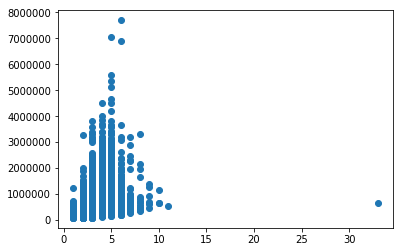

In [107]:
plt.scatter(df.bedrooms,df.price)

It is, Something weird going in with this entry thats too many bedrooms. Check out the whole entry

In [108]:
df.loc[df.bedrooms==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


33 bedrooms and 1.75 bathrooms. I wouldn't want to live there. And all on a 1620 sqft living area? Those bedrooms are less than 50 sqft each. Is this a jail? Dropped

In [109]:
df.drop(labels=15856, axis=0, inplace=True)

In [110]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,5.400530e+05,3.371662,2.115729,2079.849208,1.509102e+04,1.494149,0.233874,3.409650,7.657456,1788.592300,291.256908,1971.003390,68.869921,98077.938188,47.560174,-122.213943,1986.330423,12751.453397
std,3.660674e+05,0.904162,0.768616,917.462472,4.138112e+04,0.539808,0.765702,0.650579,1.172661,827.749142,442.205716,29.376271,364.322710,53.507609,0.138529,0.140736,685.122310,27256.060980
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


OK, histograms again

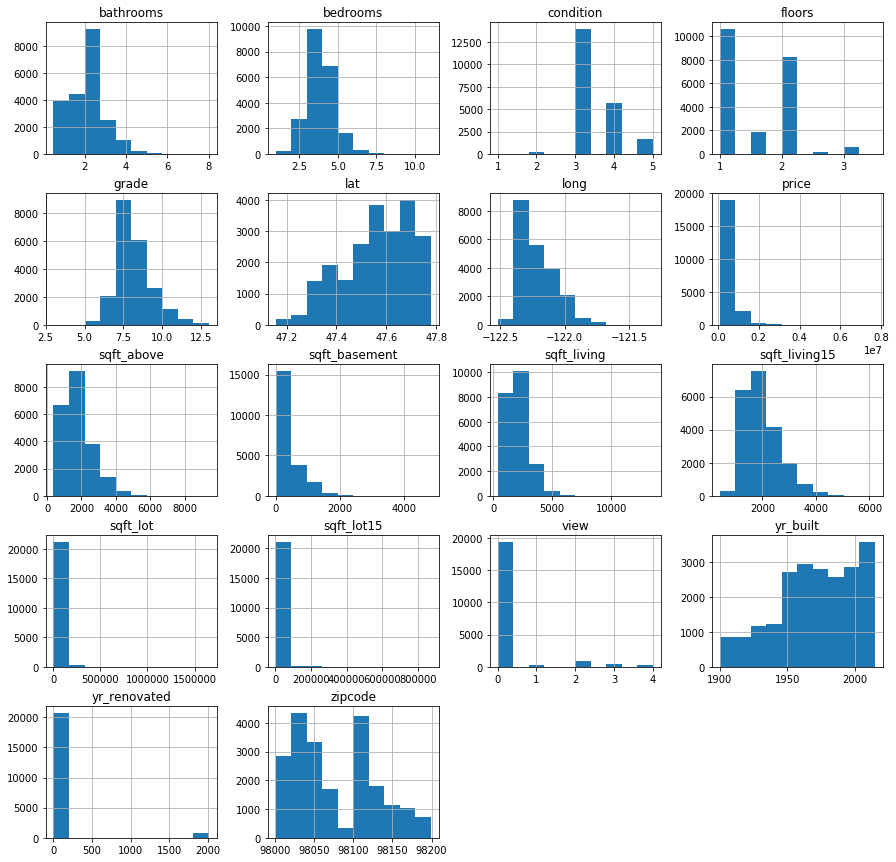

In [111]:
df.hist(figsize=(15,15))
plt.show()

form the price histogramit looks like there are a few high price outliers worth looking at in more detail

In [112]:
a=list(df.price)
b=sorted(a,reverse=True)
b[0:10]

[7700000.0,
 7060000.0,
 6890000.0,
 5570000.0,
 5350000.0,
 5110000.0,
 4670000.0,
 4500000.0,
 4490000.0,
 4210000.0]

Top 3 are noticabely higher, worth a closer look

In [113]:
df.loc[df.price==7700000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


In [114]:
df.loc[df.price==7060000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.65,-122.214,3930,25449


In [115]:
df.loc[df.price==6890000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9245,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.24,4540,42730


big houses on big lots plenty of bedroom plenty of bathrooms high grade indicates high quality fixtures and workmanship, yeah these are just expensive houses...

Remember yr_renovated? that histogram looks highly skewed because we had all those zeros. what does the rest of the data look like?

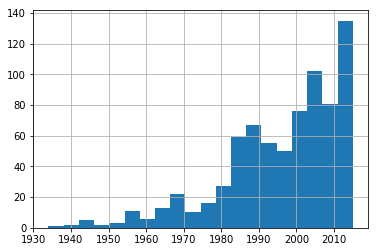

In [116]:
df.yr_renovated.loc[df.yr_renovated>0].hist(bins=20)

I could probably try binning this? Not renovated, renovated before 2000 and renovated after 2000?

In [117]:
#set all years later than 2000 equal to the value 2
df.yr_renovated.loc[df['yr_renovated']>=2000]=2
#now set all values later than 3 = 1
df.yr_renovated.loc[df['yr_renovated']>3]=1
df.yr_renovated=df.yr_renovated.astype('category')
df.yr_renovated.value_counts()
#data is binned into categories 0,1,2
#set to string

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0.0    20790
2.0      379
1.0      364
Name: yr_renovated, dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21533 entries, 0 to 21596
Data columns (total 20 columns):
date             21533 non-null object
price            21533 non-null float64
bedrooms         21533 non-null int64
bathrooms        21533 non-null float64
sqft_living      21533 non-null int64
sqft_lot         21533 non-null int64
floors           21533 non-null float64
waterfront       21533 non-null category
view             21533 non-null float64
condition        21533 non-null int64
grade            21533 non-null int64
sqft_above       21533 non-null int64
sqft_basement    21533 non-null float64
yr_built         21533 non-null int64
yr_renovated     21533 non-null category
zipcode          21533 non-null int64
lat              21533 non-null float64
long             21533 non-null float64
sqft_living15    21533 non-null int64
sqft_lot15       21533 non-null int64
dtypes: category(2), float64(7), int64(10), object(1)
memory usage: 3.2+ MB


Maybe took a look at some of this skewed data, what are the outliers?


In [119]:
a=list(df.sqft_lot)
b=sorted(a,reverse=True)
b[0:10]

[1651359,
 1164794,
 1074218,
 1024068,
 982998,
 982278,
 920423,
 881654,
 871200,
 871200]

In [120]:
df.loc[df.sqft_lot>1000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,3/27/2015,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
7640,5/21/2014,542500.0,5,3.25,3010,1074218,1.5,0.0,0.0,5,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
7762,1/19/2015,855000.0,4,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
17305,5/4/2015,190000.0,2,1.00,710,1164794,1.0,0.0,0.0,2,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


these big lots have got to be farms or something, big variation in house types in this data set

In [121]:
len(df.zipcode.unique())

70

zipcode is currently considered a numerical feature but the is no numerical relationship between zipcodes. These should be reclassified as categories and set to strings to be one-hot encoded later, this will result in 70 extra columns which may result in excessive multidimensionality

latitiude and longitude relate to phyiscal location in the same way zipcode does but do have a numerical assosciation ie higher numbers indicate more east or more north. since I intend to perofrm one hot encoding on zipcodes however this provides a similar functio nto binning both theses variable at once into zones (thats what zipcodes are)
These columns can be dropped from the dataframe

In [122]:
df.drop(columns=['lat','long'],inplace=True)

In [123]:
df.zipcode=df.zipcode.astype(str)

Show scatter plots related to price


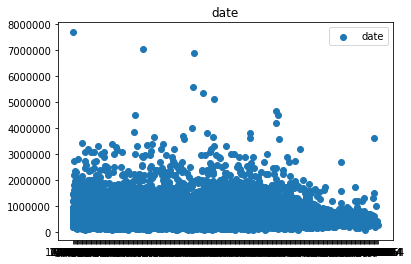

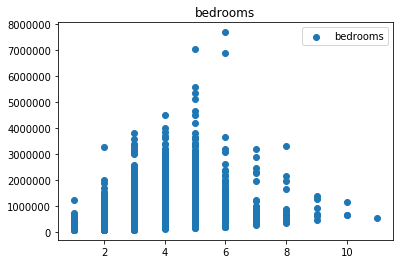

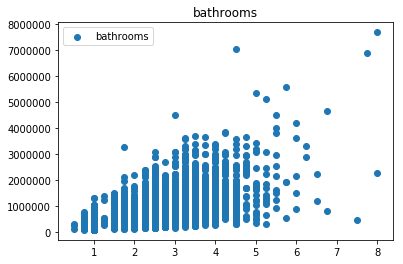

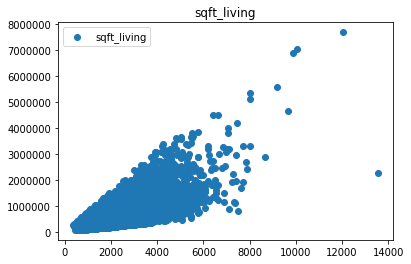

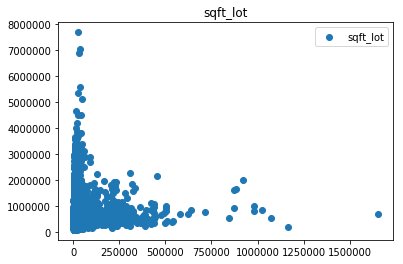

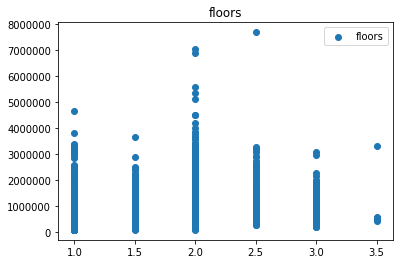

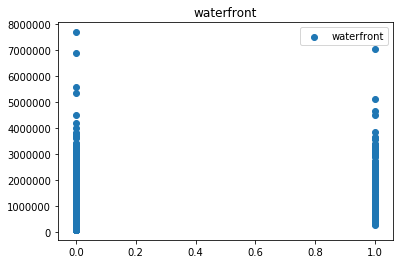

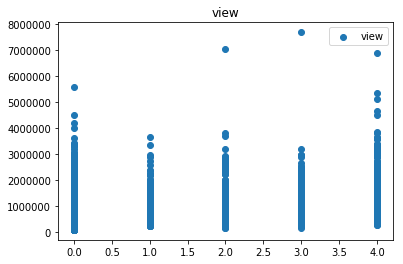

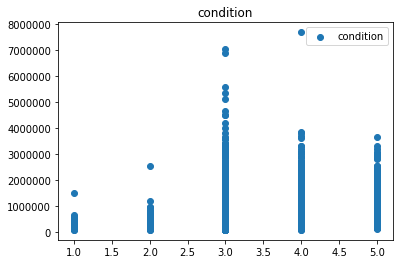

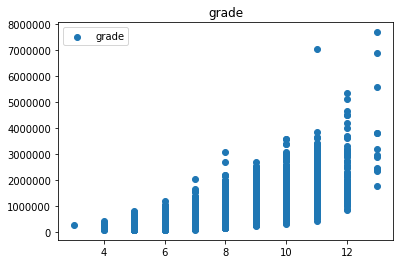

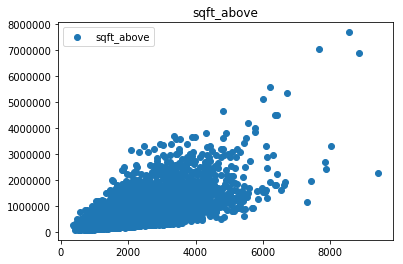

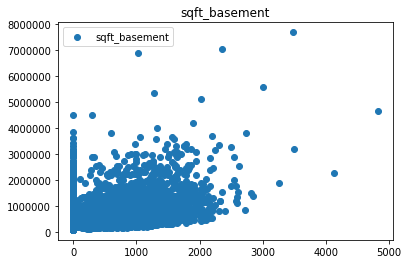

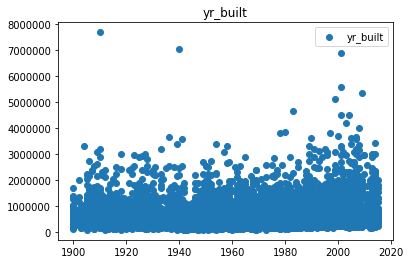

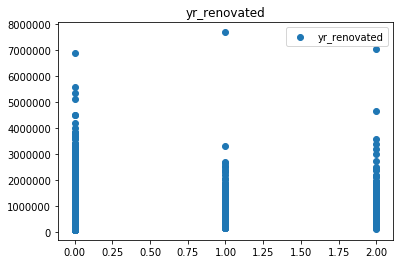

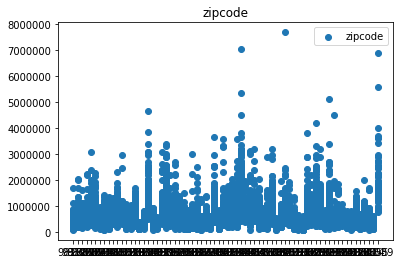

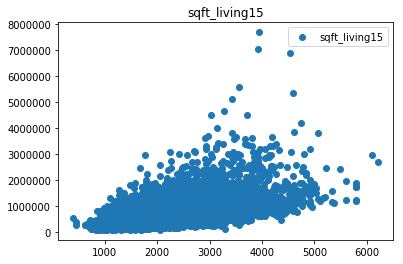

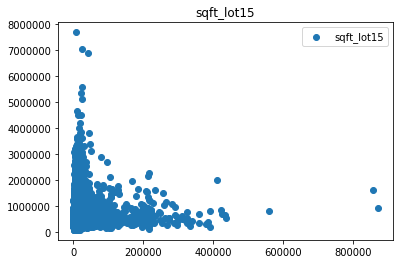

In [124]:
for col in df.columns:
    if col=='price':
        pass
    else:
        plt.scatter(df[col],df.price, label =col)
        plt.title(col)
        plt.legend()
        plt.show()

prices are very skewed toward the lower end taking the log of price

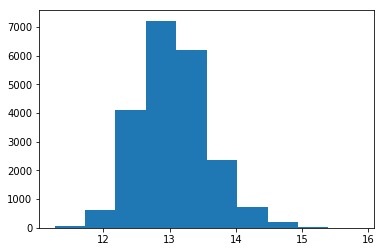

In [125]:
price_log=np.log(df.price)
plt.hist(price_log)
plt.show()

cool, very normal. Apply to dataframe


In [126]:
df.price=price_log

In [127]:
df.price.describe()

count    21533.000000
mean        13.048025
std          0.526314
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

Scatter plots again with log_price

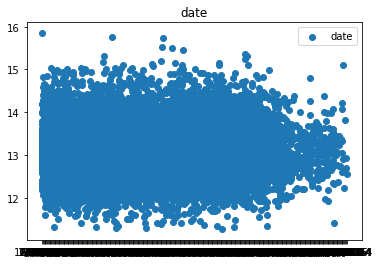

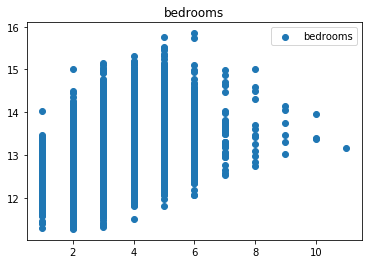

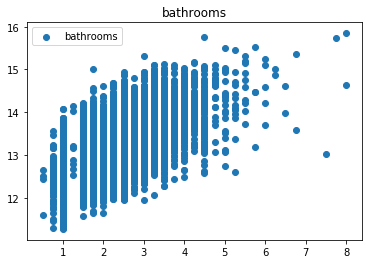

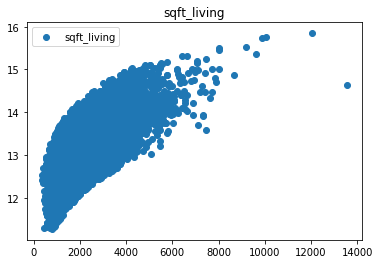

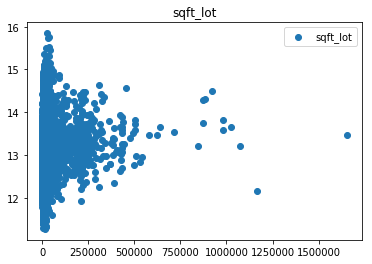

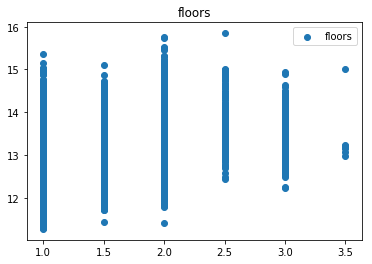

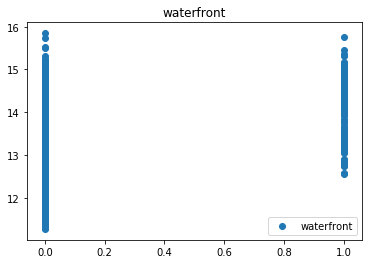

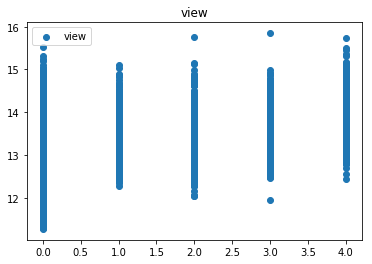

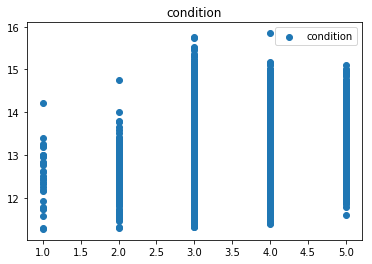

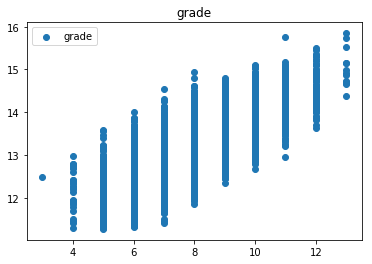

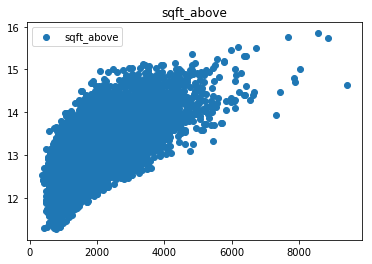

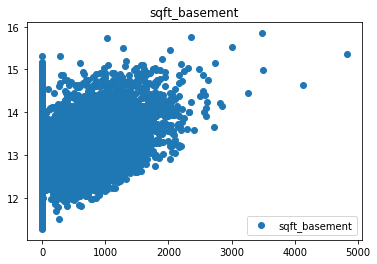

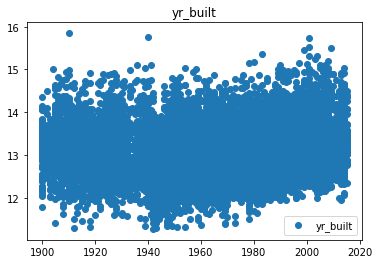

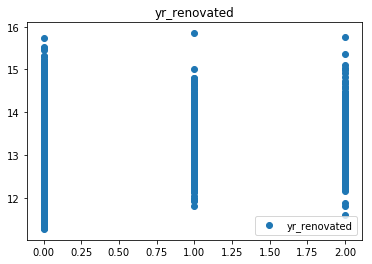

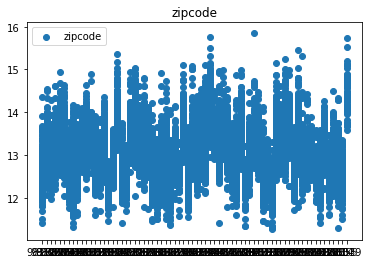

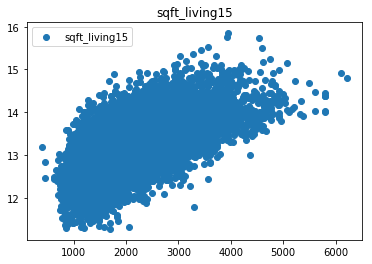

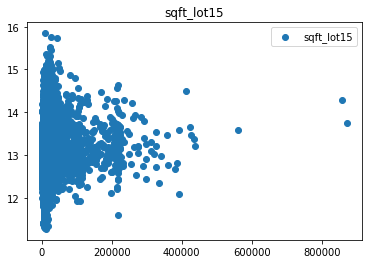

In [128]:
for col in df.columns:
    if col=='price':
        pass
    else:
        plt.scatter(df[col],df.price, label =col)
        plt.title(col)
        plt.legend()
        plt.show()

some more of these look like they could be log transformed or normalized, certainly the all the sqft features
try taking logs first

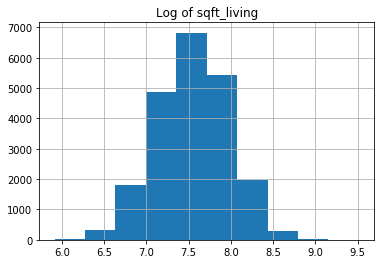

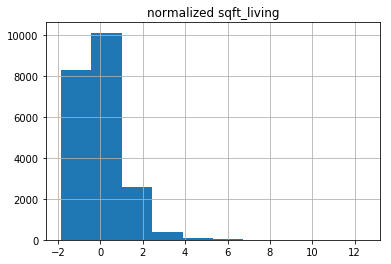

In [129]:
log_sqft_living=np.log(df.sqft_living)
norm_sqft_living=(df.sqft_living-df.sqft_living.mean())/df.sqft_living.std()
log_sqft_living.hist()
plt.title('Log of sqft_living')
plt.show()
norm_sqft_living.hist()
plt.title('normalized sqft_living')
plt.show()

perform log transformations on sqft features

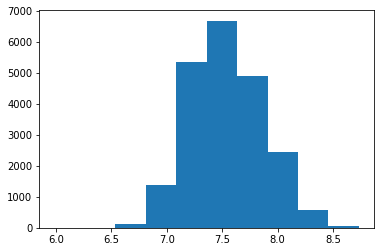

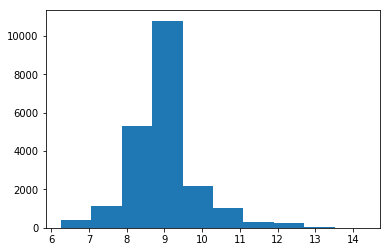

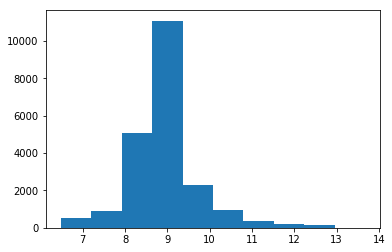

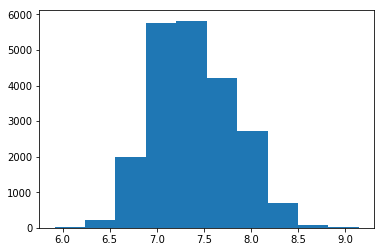

In [130]:
log_sqft_living15=np.log(df.sqft_living15)
log_sqft_lot=np.log(df.sqft_lot)
log_sqft_lot15=np.log(df.sqft_lot15)
log_sqft_above=np.log(df.sqft_above)
plt.hist(log_sqft_living15)
plt.title
plt.show()
plt.hist(log_sqft_lot)
plt.show()
plt.hist(log_sqft_lot15)
plt.show()
plt.hist(log_sqft_above)
plt.show()

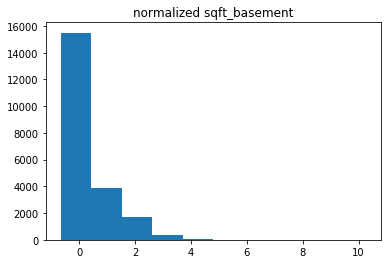

In [131]:
norm_sqft_basement=(df.sqft_basement-df.sqft_basement.mean())/df.sqft_basement.std()
plt.hist(norm_sqft_basement)
plt.title('normalized sqft_basement')
plt.show()

In [132]:
(df.sqft_basement.max()-df.sqft_basement.min())

4820.0

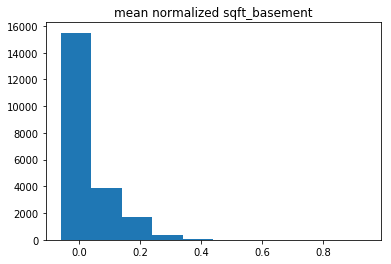

In [133]:
mean_norm_sqft_basement=(df.sqft_basement-df.sqft_basement.mean())/(df.sqft_basement.max()-df.sqft_basement.min())
plt.hist(mean_norm_sqft_basement)
plt.title('mean normalized sqft_basement')
plt.show()

#Keeping up with the Joneses
We can't help but compare ourselves to others, especially those nearest to us. This dataset doesn't just provide data about the house itself it also provides interesting information about the houses nearby.
Does a house gain or lose value by being bigger than its neighbors?
Taking the difference between sqft_living and sqft_living15 determines whether the house in question is bigger or smaller than those around it

In [69]:
df['jones']=np.array(df.sqft_living)-np.array(df.sqft_living15)
df.jones.describe()

count    21597.000000
mean        93.701533
std        600.611048
min      -2310.000000
25%       -220.000000
50%          0.000000
75%        310.000000
max       8690.000000
Name: jones, dtype: float64

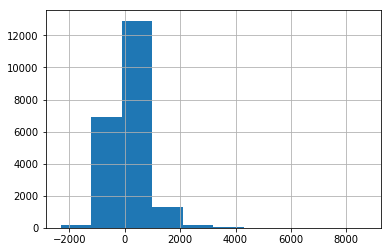

In [75]:
df.jones.hist()

<function matplotlib.pyplot.show(*args, **kw)>

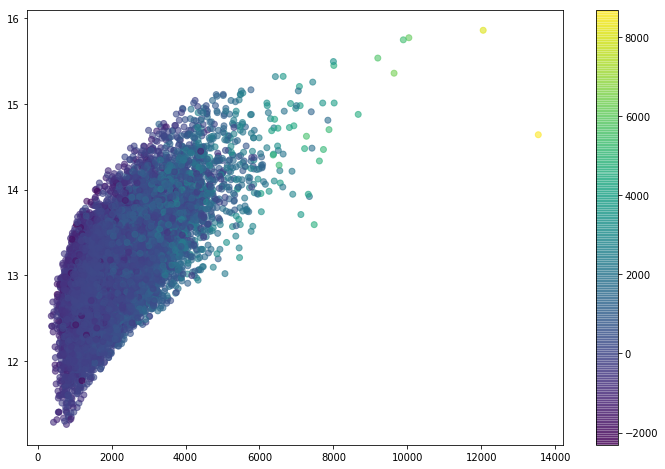

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(df.sqft_living,df.price, alpha=0.6, c=df.jones)
plt.colorbar()
plt.show()


log transfrom sqft_living for to normalize

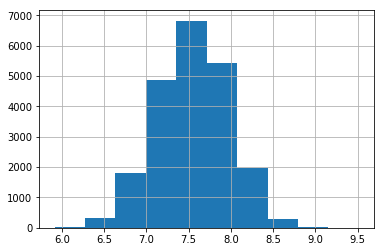

In [86]:
log_sqft_living=np.log(df.sqft_living)
log_sqft_living.hist()

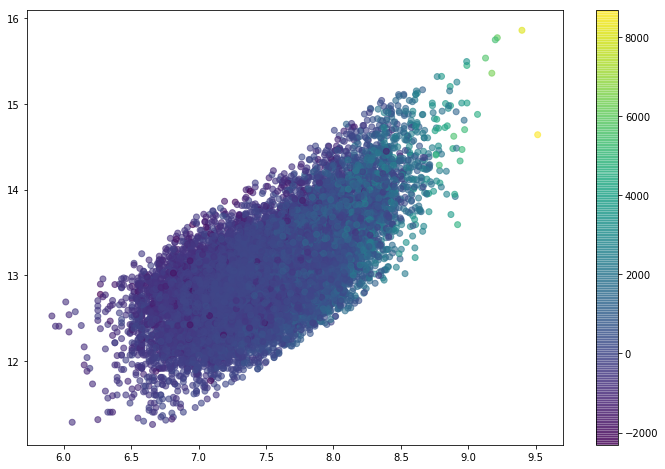

In [87]:
plt.figure(figsize=(12,8))
plt.scatter(log_sqft_living,df.price, alpha=0.6, c=df.jones)
plt.colorbar()
plt.show()


Checking for covarianvce

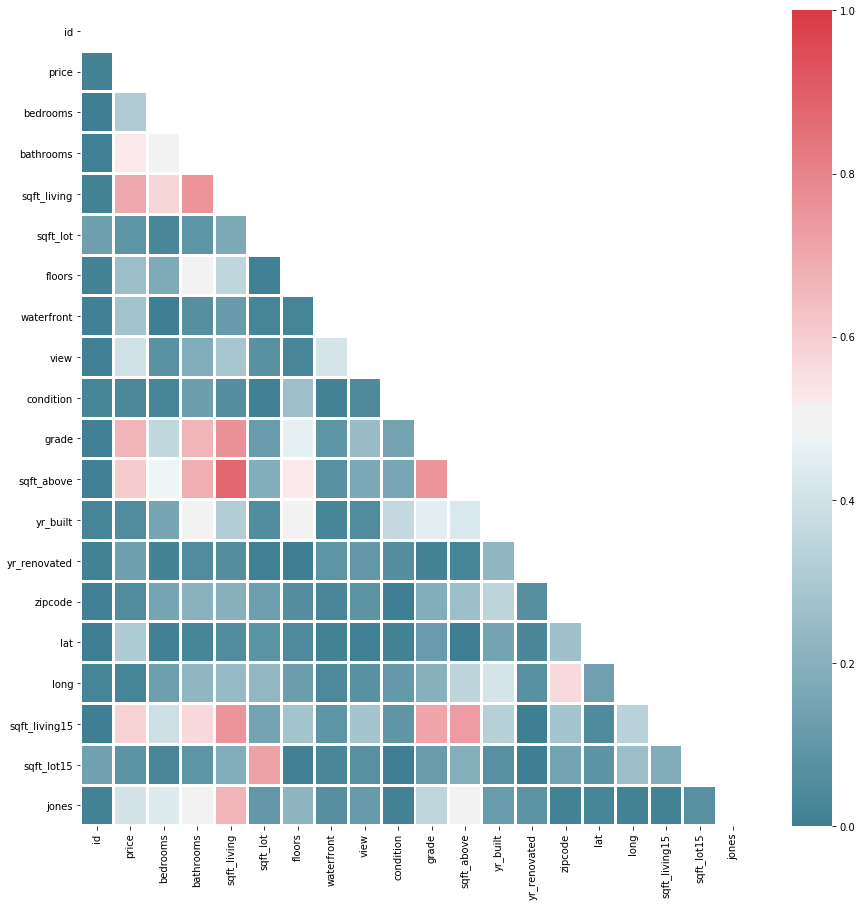

In [71]:
corr=df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10, as_cmap=True)
plt.figure(figsize=(15,15))
sns.heatmap(np.abs(corr),linewidths=2,mask=mask,cmap=cmap)

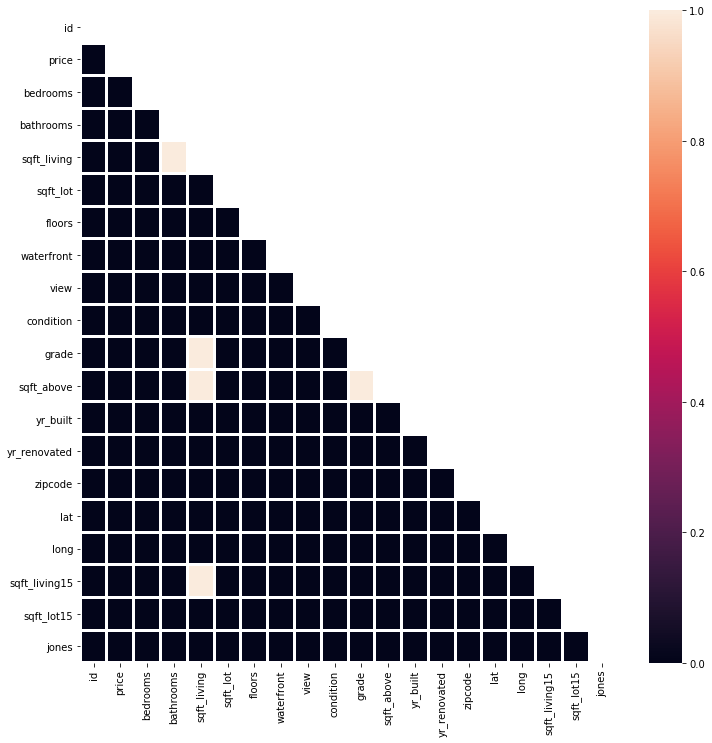

In [74]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(abs(corr)>.75,mask=mask,linewidths=2)

drop sqft_living for excessive colinearity